<a href="https://colab.research.google.com/github/Plumz17/CVL_Assignment01/blob/main/CVL_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Computer Vision Assignment - Implementation of Image Enhancement Methods - Anders Emmanuel Tan (24/541351/PA/22964)

Description: In this Assignment, I will implement several Image Enhancement methods for a couple of Images, including:
*   Dark Images (Underexposed)
*   Bright Images (Overexposed)
*   Low Contrast Images
*   Noisy Images
*   Blurry Images

For each of those images, I will implement 2 - 3 Image Enhancement Approaches and we will see which results in the best output within the image types I mentioned. (Note: Since this assignment is similar to the second assignment of my Digital Image Processing course last semester, I will use my previous submission as a base and built upon it by adding and changing some of the implementations)


## 1. Setting Up Image to be Processed
Description: For this first section, we will be preparing the images that will later be processed. Since the uploaded files in Google Colab are only available in the runtime,I will be attaining those files by cloning them from the Github Submission link. Additionaly, we will also be importing the libaries that we will be using for this submission to import and process the images. We will also convert the images into grayscale in order to ease the image enhancement process. Lastly, I will also provide a helper function to help compare the enhanced images with the original.

In [ ]:
# Cloning Github Repository to get the Image
!rm -rf CVL_Assignment01
!git clone https://github.com/Plumz17/CVL_Assignment01

Cloning into 'CVL_Assignment01'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 66 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 4.07 MiB | 12.48 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Numeric types
import matplotlib.pyplot as plt # For Showing Image
import math # For Math

filename_dark = "/content/CVL_Assignment01/dark.png"
filename_bright = "/content/CVL_Assignment01/bright.jpg"
filename_low = "/content/CVL_Assignment01/low.png"
filename_noisy = "/content/CVL_Assignment01/noisy.jpg"
filename_blur = "/content/CVL_Assignment01/blur.png"


img_dark = cv2.imread(filename_dark) # Read Image
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_BGR2GRAY) # Change the color map
img_bright = cv2.imread(filename_bright) # Read Image
img_bright = cv2.cvtColor(img_bright, cv2.COLOR_BGR2GRAY) # Change the color map
img_low = cv2.imread(filename_low)
img_low = cv2.cvtColor(img_low, cv2.COLOR_BGR2GRAY)
img_noisy = cv2.imread(filename_noisy)
img_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2GRAY)
img_blur = cv2.imread(filename_blur)
img_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

In [ ]:
def show(before, after, title2= "Enhanced"): # Helper function to check the before and after of the enhancement
  plt.figure(figsize=(10,5))

  # Show original
  plt.subplot(1,2,1)
  plt.imshow(before, cmap='gray', vmin=0, vmax=255) #vmin and max to preserve original image's contrast
  plt.title("Original")
  plt.axis("off")

  # Show processed
  plt.subplot(1,2,2)
  plt.imshow(after, cmap='gray', vmin=0, vmax=255)
  plt.title(title2)
  plt.axis("off")

  plt.show()

## 2. Enhancing Dark Images
Description: In the second segment of this Assingnment, I will be focusing on the Image Enhancement Methods on Images which are too dark. This condition is commonly found in the real world when an image is underexposed or when the enviornment where the image was taken have limited lighting. Three main methods will be implemented for this case:

*   Negative Image Transformation
*   Logarithmic Transformation
*   Gamma Correction (Gamma < 1.0)

(Image Source: https://www.mathworks.com/help/images/learning-to-see-in-the-dark.html)

### 2A. Negative Image Transformation

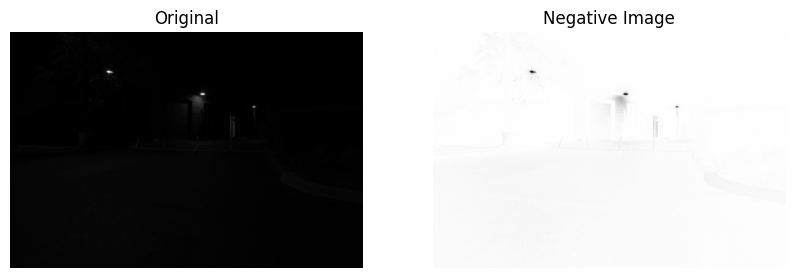

In [ ]:
def negative(img):
  out = img.copy()
  L = 256 # max pixel
  for i in range(out.shape[0]): #Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = L - 1 - out[i][j] # Use the formula s = (L - 1) - r, where L is 256 so s = 255 - r
  return out

show(img_dark, negative(img_dark), "Negative Image")

### 2B. Log Transformation

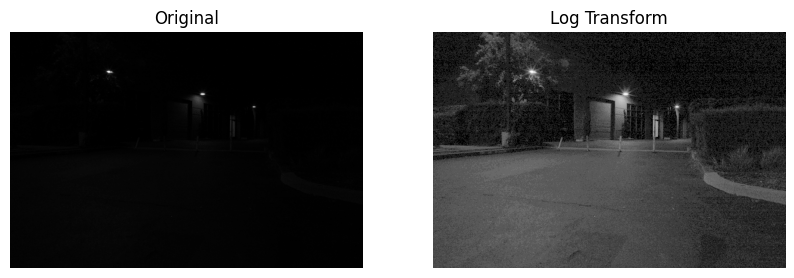

In [ ]:
def log_transform(img):
  out = img.copy().astype(float) # So we can handle commas to be log-ed
  R_max = np.max(out)
  L = 256
  c = (L - 1) / np.log(1 + R_max) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = c * np.log(1 + out[i][j]) #Use the formula s = c * log(1+r)
  return out.astype(np.uint8)

show(img_dark, log_transform(img_dark), "Log Transform")

###2C. Gamma Correction (Gamma < 1)

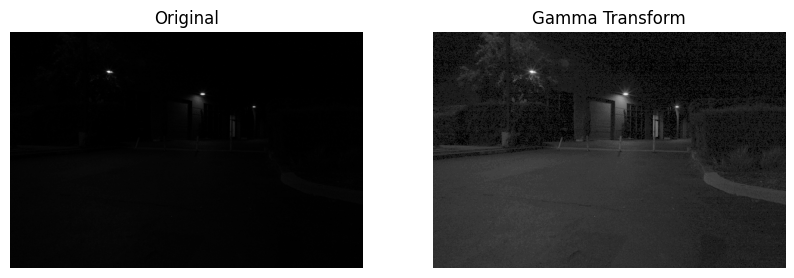

In [ ]:
def gamma(img, gamma=0.4):
  out = img.astype(float)
  R_max = np.max(img)
  L = 256
  c = (L - 1) / (R_max ** gamma) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = c * (img[i][j] ** gamma) # Use the Formula s = c * r ^ gamma
  return out.astype(np.uint8)

show(img_dark, gamma(img_dark), "Gamma Transform")

## 3. Enhancing Bright Images
Description: In this section of the assignment, I will be focusing on Image Enhancement techniques on Images that are too bright. On the contrary to the previous section, this condition happens when an image is overexposed or when the environment where the image was taken has an abundance of light. Three main methods will be implemented for this case:
*   Negative Image Transformation
*   Gamma Correction (Gamma < 1.0)
*   Inverse Log Transformation

Since some of these methods have been implemented in the previous section, I will be reusing their code to save time.

(Image Source: https://photo.stackexchange.com/questions/67848/why-are-all-my-photos-overexposed)

### 3A. Image Negative

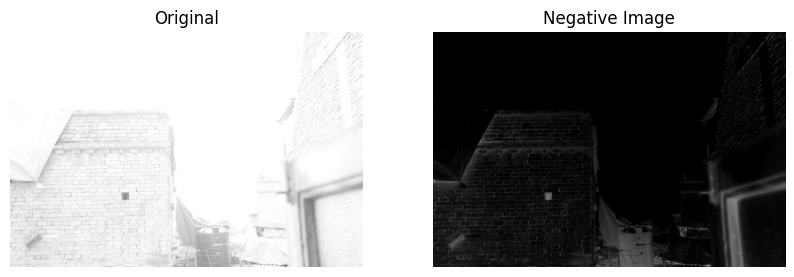

In [ ]:
show(img_bright, negative(img_bright), "Negative Image")

### 3B. Gamma Correction (Gamma > 1)

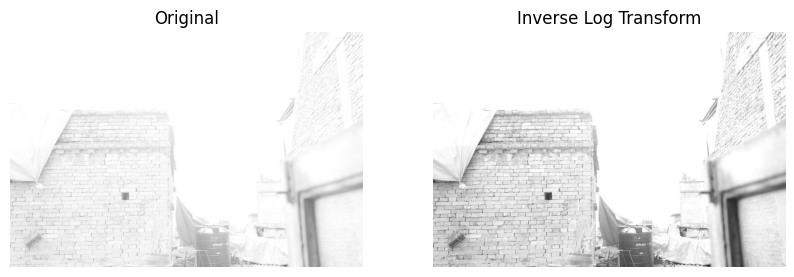

In [ ]:
show(img_bright, gamma(img_bright, 2.5), "Inverse Log Transform")

###3C. Inverse Log Transform

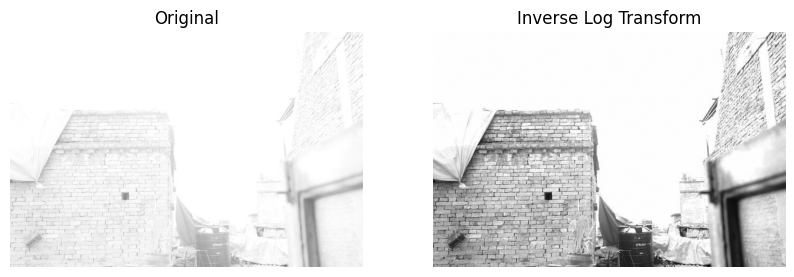

In [ ]:
def inverse_log_transform(img):
  out = img.copy().astype(float) # So we can handle commas to be log-ed
  S_max = np.max(out)
  L = 256
  c = (L - 1) / np.log(1 + S_max) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = math.exp(out[i][j] / c) - 1 #Use the formula r = e^(s/c) - 1 (since this is the inverse of log transform)
  return out.astype(np.uint8)

show(img_bright, inverse_log_transform(img_bright), "Inverse Log Transform")

## 3. Enhancing Low Contrast Images
Description: In this section of the assignment, I will be focusing on Image Enhancement techniques on Images that are low contrast. Low Contrast Images usually occur during uneven lighting condition such as during fogs, rains, overcast days, or limited camera sensor quality. During these conditions, the difference between the bright and dark parts of the image becomes unclear which makes details less visible. Three main methods will be implemented for this case:
*   Gray Level Slicing
*   Contrast Stretching
*   Histogram Equilization


(Image Source: https://theailearner.com/tag/low-contrast-image/)

## 4A. Grey Level Slicing

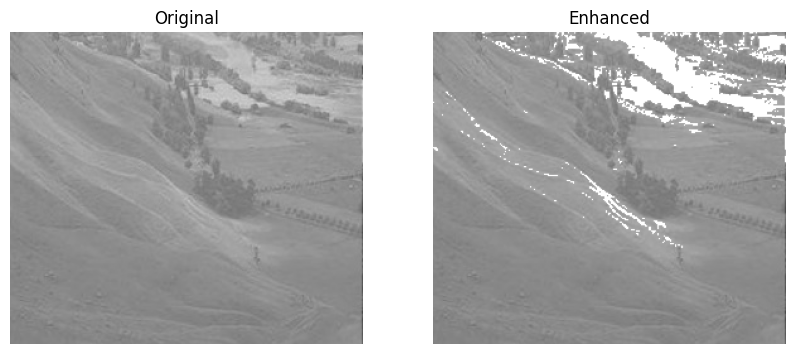

In [ ]:
def grey(img, low, high):
  out = img.copy().astype(float)
  for i in range(out.shape[0]): #Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      if (low <= img[i, j] <= high):
        out[i, j] = 255

  return out.astype(np.uint8)

show(img_low, grey(img_low, 170, 210))


### 4B. Contrast Stretching

211.0 73.0


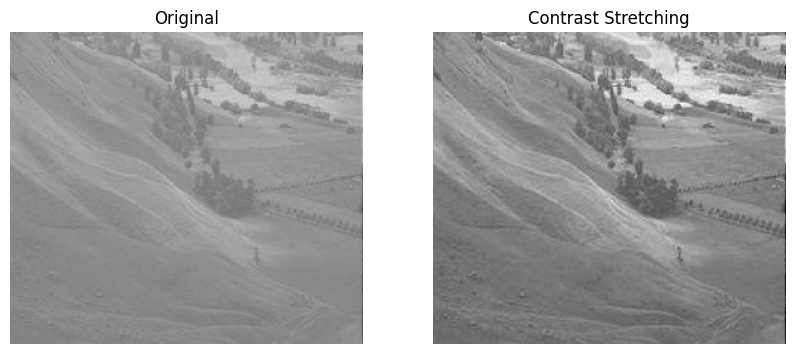

In [ ]:
def stretch(img):
  out = img.astype(float)
  # Grab some variables for the formula
  max, min = np.max(out), np.min(out)
  print(max, min)
  a, b = 0, 255
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = (b - a) * (out[i][j] - min) / (max - min) + a # Apply constrast stretching formula
  return out.astype(np.uint8)

show(img_low, stretch(img_low), "Contrast Stretching")

### 4C. Histrogram Equalization

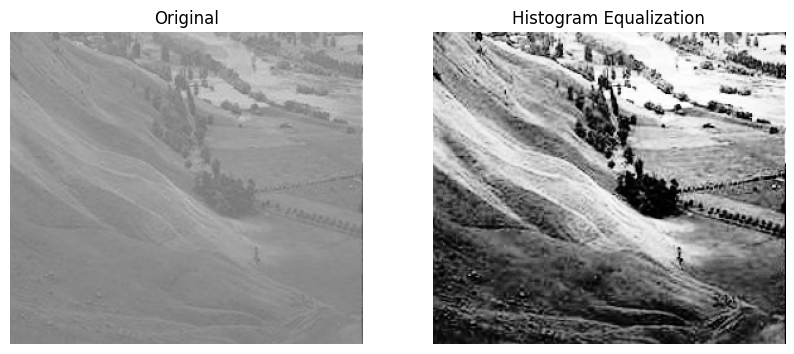

In [ ]:
def hist(img):
  L = 256
  #Make Histograms
  hist = np.zeros(L)
  for i in range(img.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(img.shape[1]): #Iterate for every pixel in the y axis
      hist[int(img[i,j])] += 1 # Add that pixel to the histogram

  pdf = hist / (img.shape[0] * img.shape[1]) # Calculate the probablity distribution function (From Probability and Stotastic Process Subject)
  cdf = np.zeros(L)
  cdf[0] = pdf[0]
  for i in range(1, L): # Calculate the cumulative distribution function
    cdf[i] = cdf[i - 1] + pdf[i]

  cdf = (cdf * (L - 1)).astype(np.uint8) # Calculate the pixel value using cdf so it's between 0 and 255

  out = np.zeros(img.shape, dtype=np.uint8)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i,j] = cdf[img[i,j]]
  return out

show(img_low, hist(img_low), "Histogram Equalization")

## 5. Enhancing Noisy Images
Description: In this section of the Assignment, I will be focusing on images with a lot of noise. Noise usually appears when the camera quality is bad or when the image transmission process is interrupted. The existence of noise causes details in the image to be more unclear. Therefore, a "filtering" process is needed to make the image clearer. To do so, we can use a process called Convolution. We will be implementing three of these methods, which are:
*   Median Filter
*   Average/Mean Filter
*   Gaussian Filter

Image Source: https://boofcv.org/index.php?title=Example_Wavelet_Noise_Removal

### 5A. Median Filter

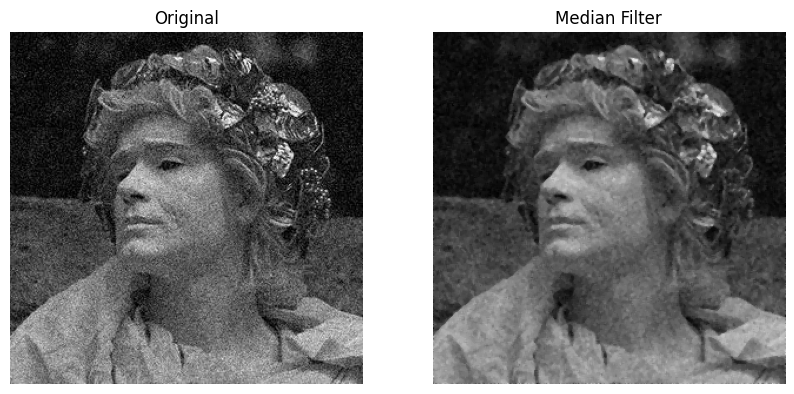

In [ ]:
def median(img):
  out = img.copy().astype(float)
  height, width = img.shape
  #Iterate with a margin of one
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      #Collect 3x3
      neighbors = []
      for x in range(-1, 2):
        for y in range(-1, 2):
          neighbors.append(img[i + x, j + y])

      neighbors.sort()
      out[i, j] = neighbors[4] #Get middle value (median)
  return out

show(img_noisy, median(img_noisy), "Median Filter")

### 5B. Mean Filter

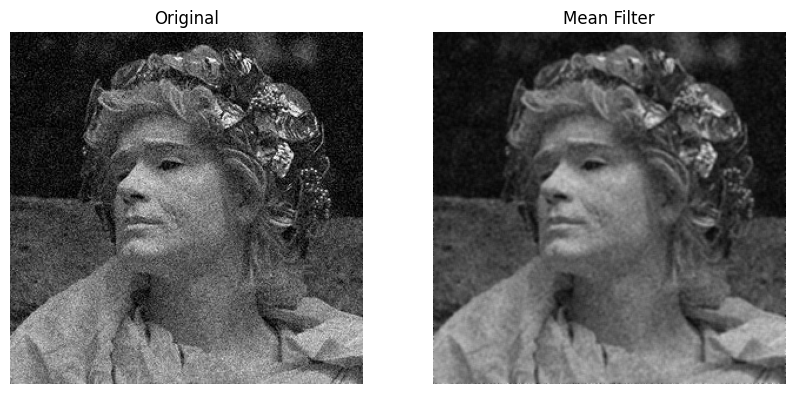

In [ ]:
def mean(img):
  img = img.astype(float)
  out = img.copy()
  height, width = img.shape
  #Iterate with a margin of one
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      #Collect 3x3
      neighbors = []
      for x in range(-1, 2):
        for y in range(-1, 2):
          neighbors.append(img[i + x, j + y])

      out[i, j] = round(sum(neighbors)/9) #Get average (mean)
  return out.astype(np.uint8)

show(img_noisy, mean(img_noisy), "Mean Filter")

### 5C. Gaussian Filter

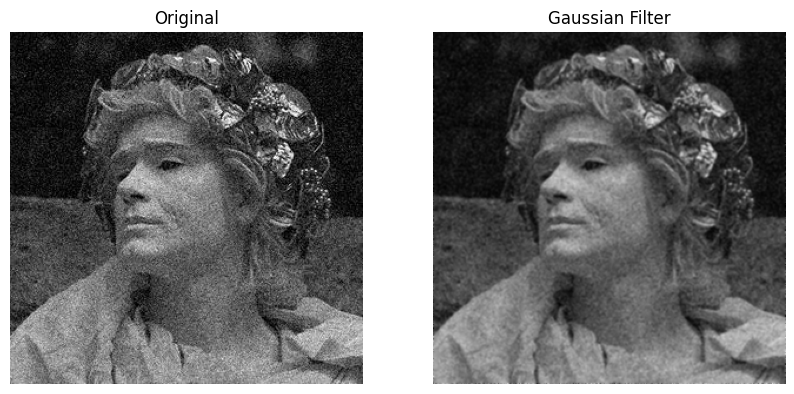

In [ ]:
def gaussian(img):
  img = img.astype(float)
  out = img.copy()
  height, width = img.shape
  # Define Gaussian Kernel
  kernel = [
      [1, 2, 1],
      [2, 4, 2],
      [1, 2, 1]
  ]
  # Apply Kernel to each pixel (Convolution)
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      total = 0
      for x in range(-1, 2):
        for y in range(-1, 2):
          total += img[i + x, j + y] * kernel[x + 1][y + 1]
      out[i, j] = total/16
  return out.astype(np.uint8)

show(img_noisy, gaussian(img_noisy), "Gaussian Filter")

## 6. Enhancing Blurry Images
Description: Pada bagian keempat Assignment ini, saya akan fokus pada citra yang terlalu kabur. Citra blur dapat disebabkan oleh pergerakan kamera ataupun fokus lensa yang salah. Akibatnya, detail-detail penting menjadi hilang dan tepi objek tampak kabur. kualitas citra kabur, kita dapat menggunakan teknik sharpening yang memperkuat tepi (edges) pada gambar. Pada bagian ini, saya menyoroti dua pendekatan yaitu:


Description: In this section of the Assignment, I will be focusing on blurry images. Blur usually occurs on shaking camera, improper lens focus, or low resolution image in general. As a result, small details disappear and the edge of an object will appear blurred. To resolve this, we can take advantage of image sharpening techniques which will strengthen edges in an image. We will be implementing three of these methods, which are:

*   Laplacian Sharpening
*   High Pass Filter
*   Unsharp Masking

(Note: The Strength of each methods are manually adjusted to ease comparison, this is caused by the relatively large size of the image)

Image Source: Iron Lung (2026) by Markiplier (https://www.youtube.com/watch?v=IaEtA56pd_w)

### 6A. Laplacian Sharpening

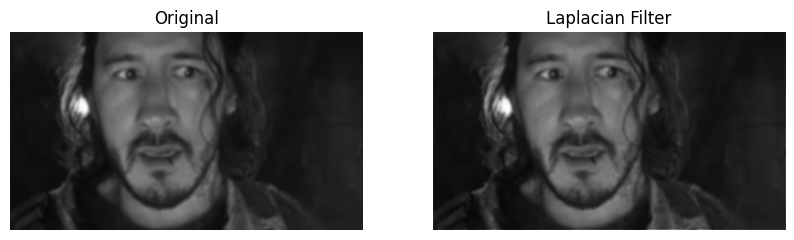

In [ ]:
def laplacian(img, strength):
  img = img.astype(float)
  out = img.copy()
  height, width = img.shape
  # Define Laplacian Kernel
  kernel = [
      [0, -1, 0],
      [-1, 4, -1],
      [0, -1, 0]
  ]
  # Apply Kernel to each pixel (Convolution)
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      total = 0
      for x in range(-1, 2):
        for y in range(-1, 2):
          total += img[i + x, j + y] * kernel[x + 1][y + 1]
      out[i, j] = total

  sharpened = img + strength * out
  sharpened = np.clip(sharpened, 0, 255)
  return sharpened.astype(np.uint8)

show(img_blur, laplacian(img_blur, 2), "Laplacian Filter")


### 6B. High Pass Filter

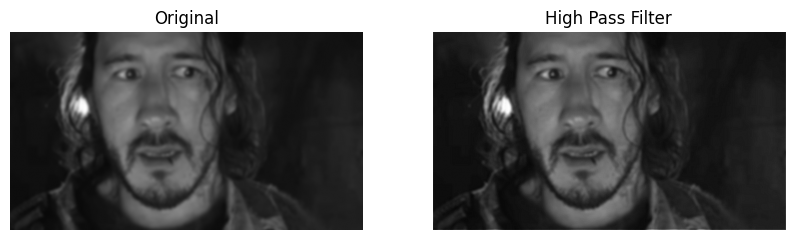

In [ ]:
def high(img, strength):
  img = img.astype(float)
  out = img.copy()
  height, width = img.shape
  # Define High Pass Kernel
  kernel = [
      [-1, -1, -1],
      [-1, 8, -1],
      [-1, -1, -1]
  ]
  # Apply Kernel to each pixel (Convolution)
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      total = 0
      for x in range(-1, 2):
        for y in range(-1, 2):
          total += img[i + x, j + y] * kernel[x + 1][y + 1]
      out[i, j] = total

  sharpened = img + strength * out
  sharpened = np.clip(sharpened, 0, 255)
  return sharpened.astype(np.uint8)

show(img_blur, high(img_blur, 2), "High Pass Filter")


### 6C. Unsharp masking

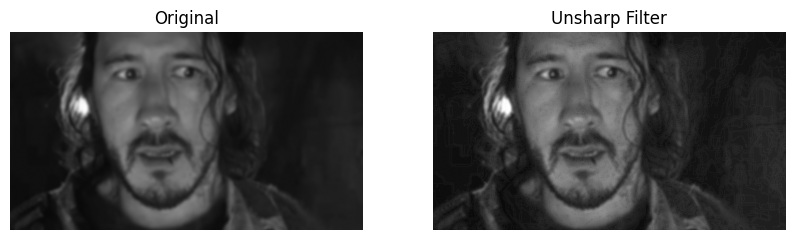

In [ ]:
def unsharp(img, factor):
  img = img.astype(float)
  blur = gaussian(img) # Get Blurred Image
  mask = img - blur #Substract Blurred Image from original
  sharpened = img + factor * mask #Add the mask back in
  sharpened = np.clip(sharpened, 0, 255)
  return sharpened.astype(np.uint8)

show(img_blur, unsharp(img_blur, 20), "Unsharp Filter")
